In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA

import rootnotes
import root_numpy
from ROOT import *
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

# local to save all results and images 

save_images = '/home/micael/MyWorkspace/ICA/BlindSeparation/run6'

print 'All imports done!'

All imports done!


/opt/root/lib/ROOT.py:466: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

In [2]:
x = np.loadtxt('SeventhMixture100Stats.txt')
x.shape

(4, 100)

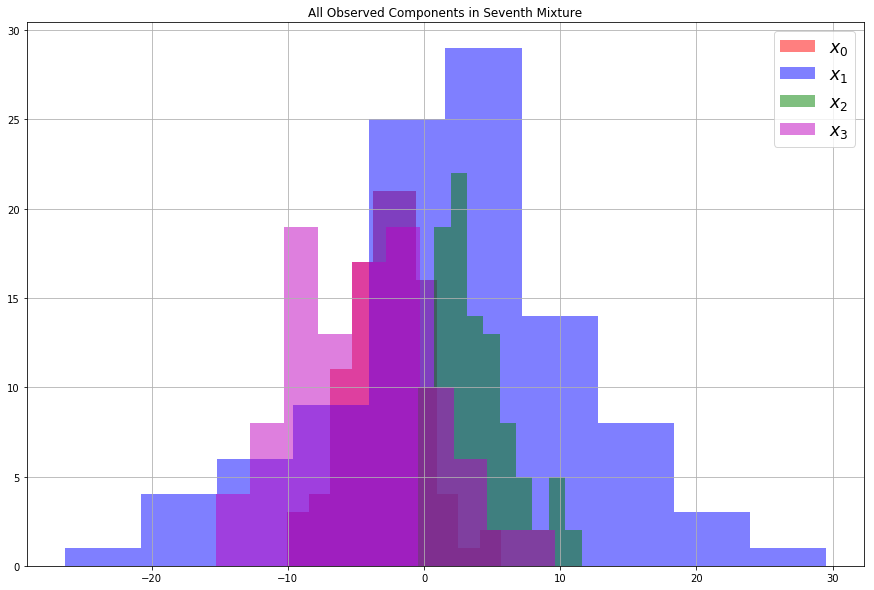

In [3]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100_all_run7.png')
plt.show()

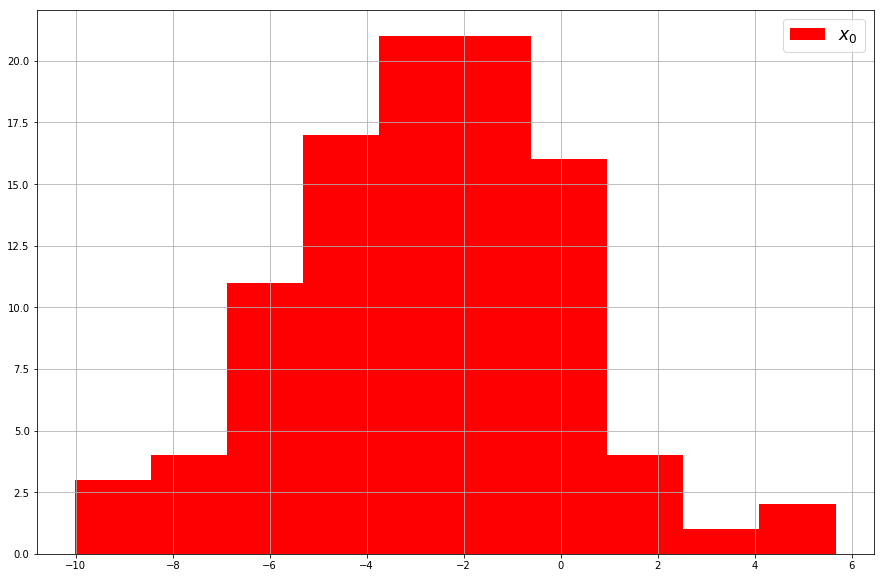

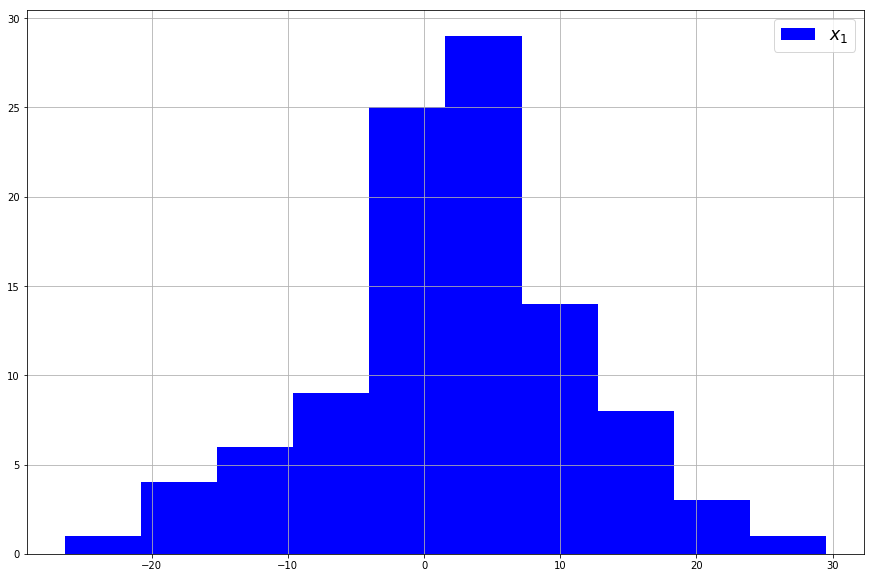

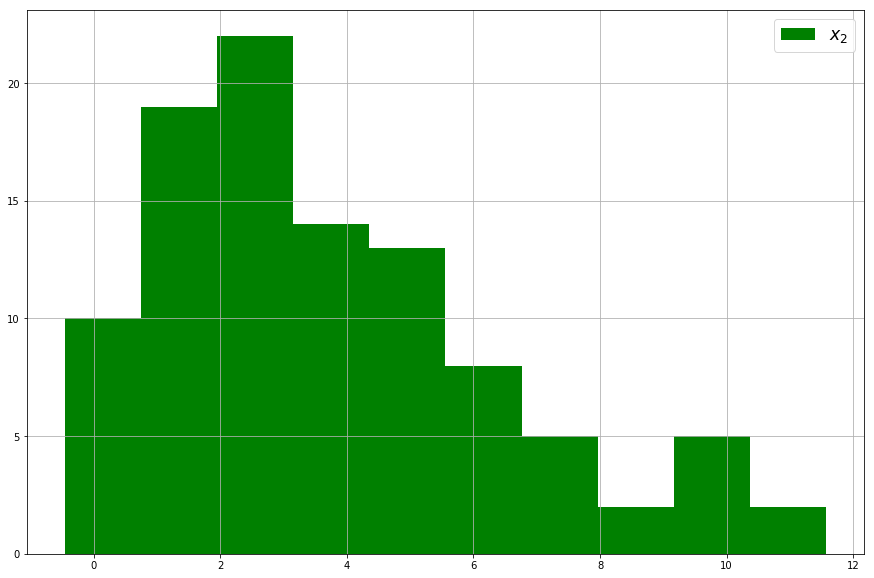

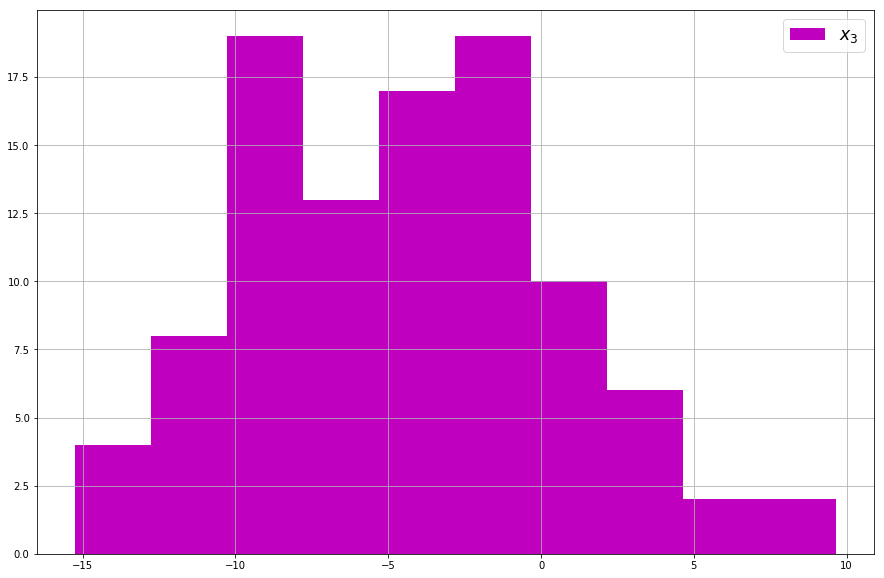

In [4]:

colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100_component_'+str(i)+'_run7.png')
    plt.show()

In [5]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 9
Time to converges the FastICA: 0.047 seconds


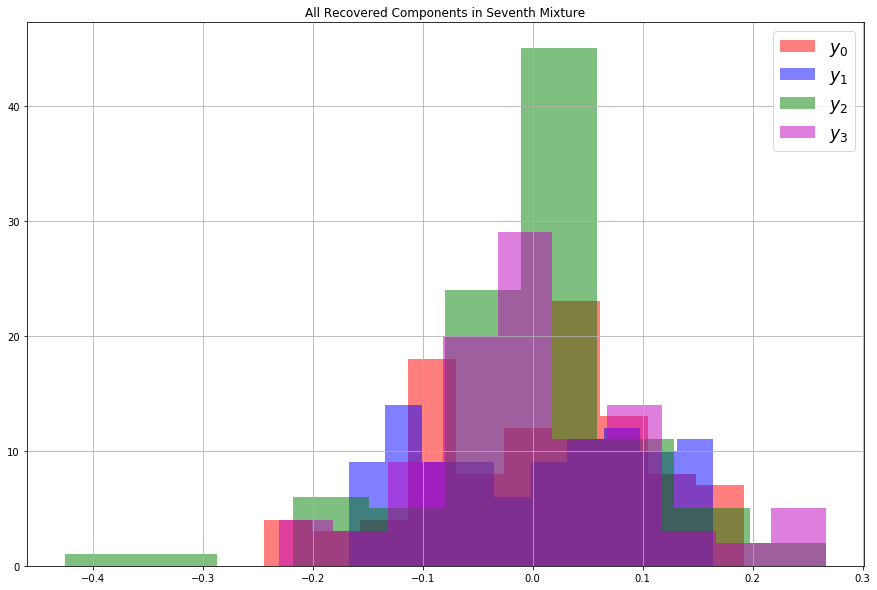

In [6]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100_all_run7.png')
plt.show()

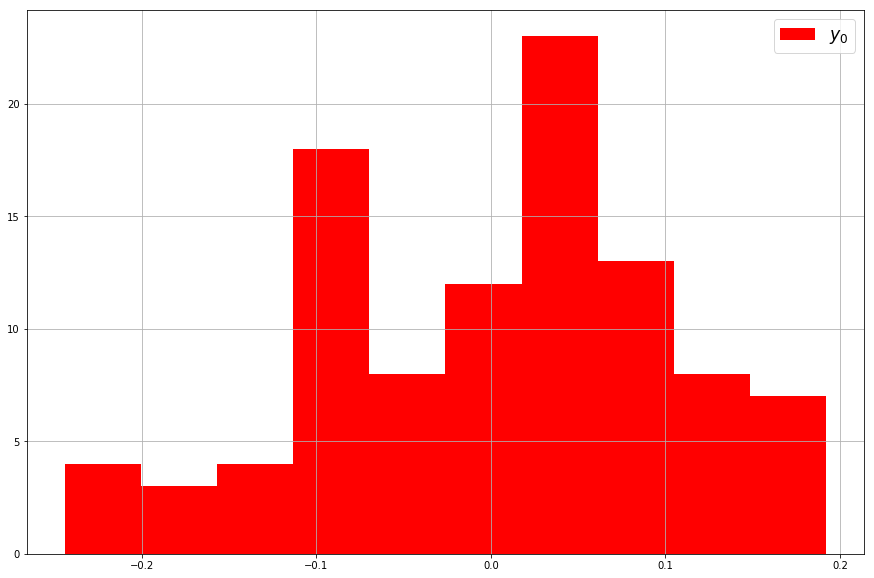

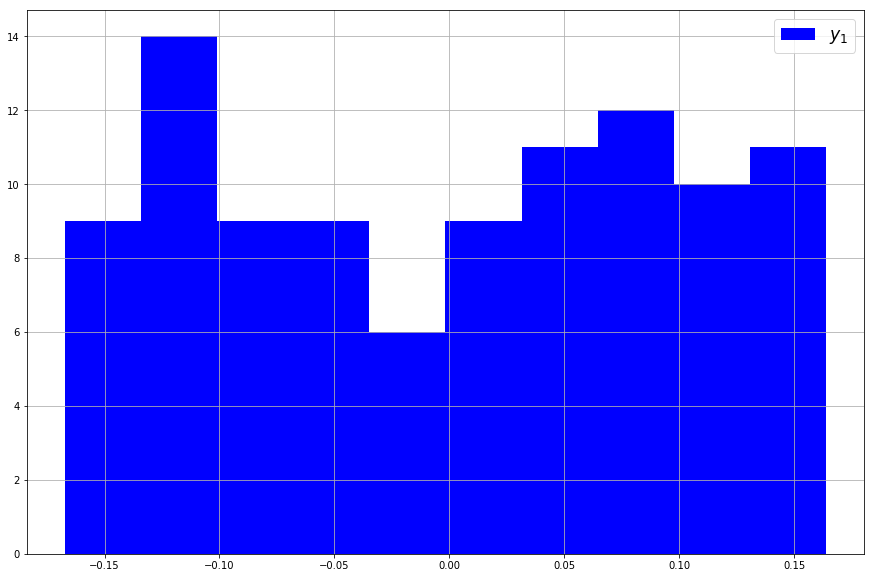

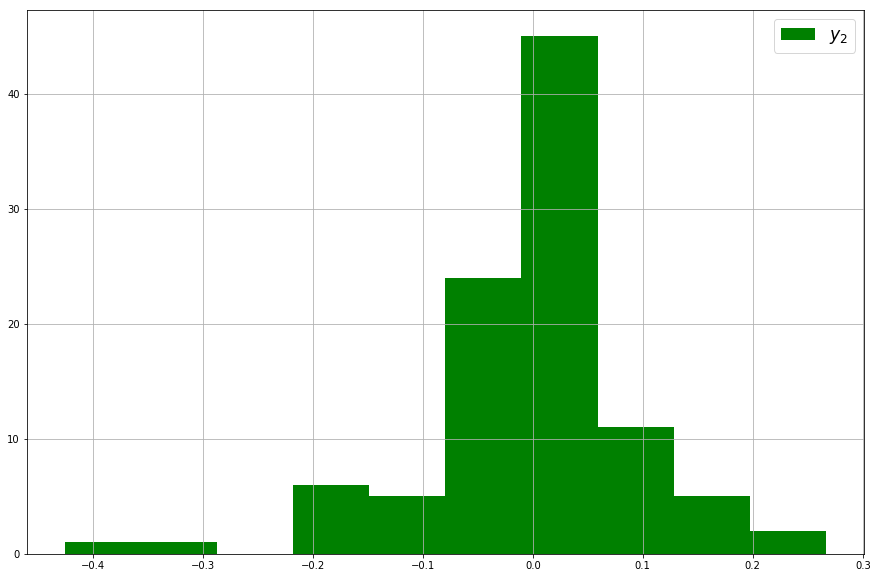

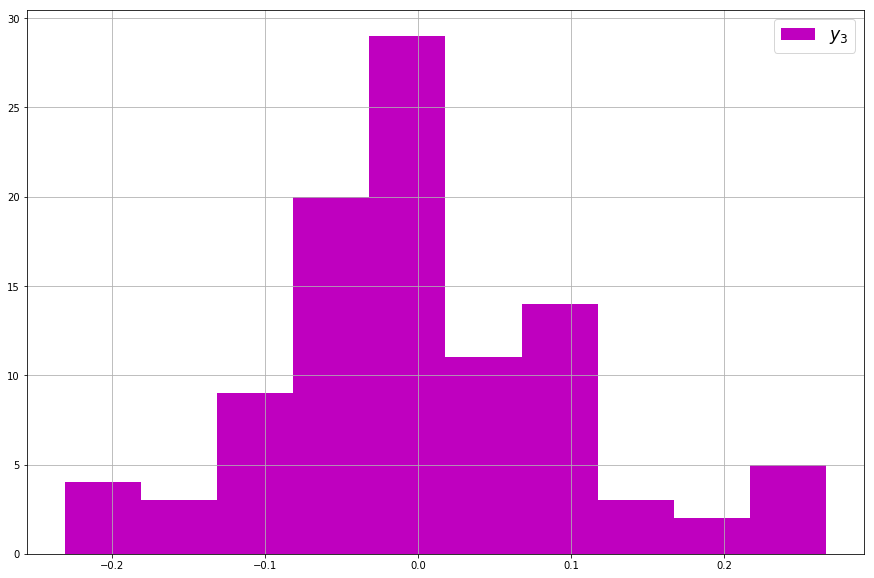

In [7]:

colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA100_component_'+str(i)+'_run7.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


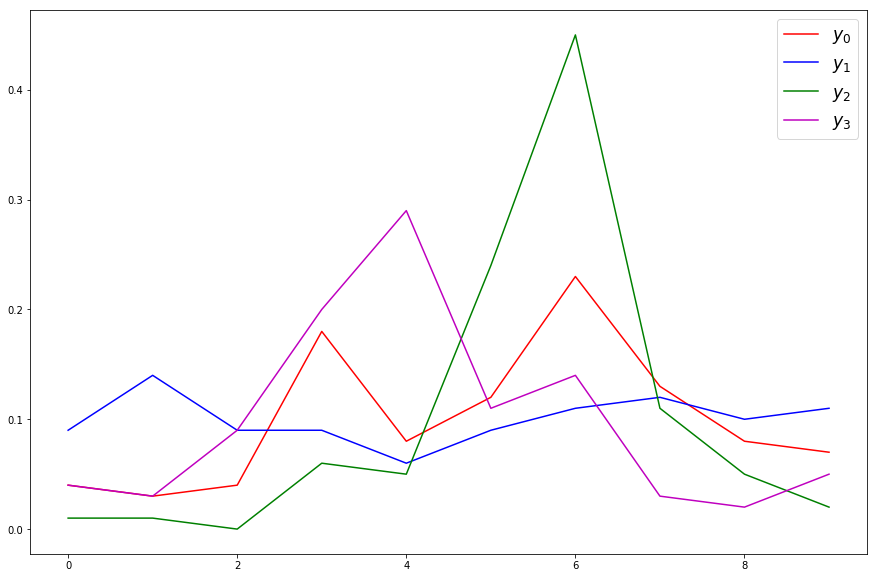

In [8]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100_run7.png')
plt.show()

In [9]:
# normalize the recovered sources 
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
        normalized_sources[i,:] = scale(recovered_sources[i,:],with_mean=False)
        print np.mean(normalized_sources[i,:])

-1.08801856413e-16
4.61852778244e-16
-2.32036612147e-16
1.68753899743e-16


In [41]:
normalized_sources[3,:]= normalized_sources[3,:]-1

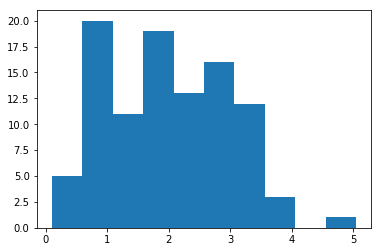

In [42]:
plt.hist(normalized_sources[3,:]+np.array(2))
plt.show()

In [12]:
bins = 25

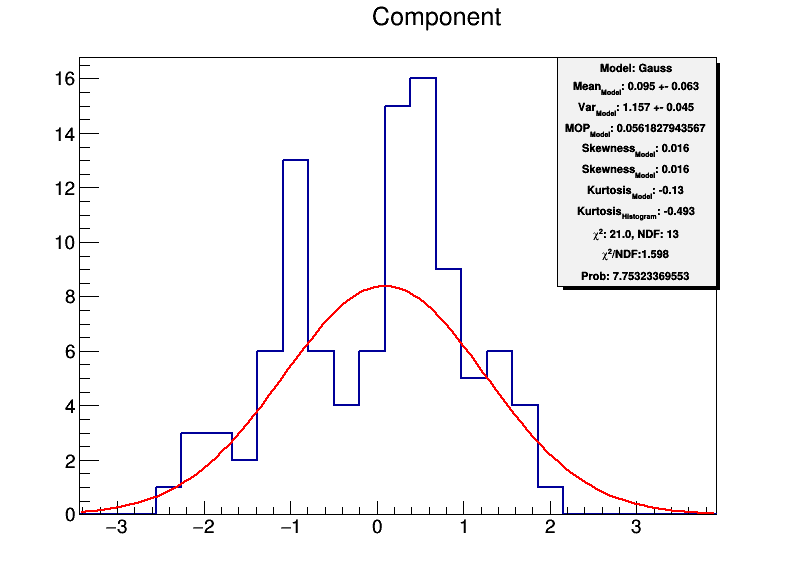

In [13]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100_run7.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


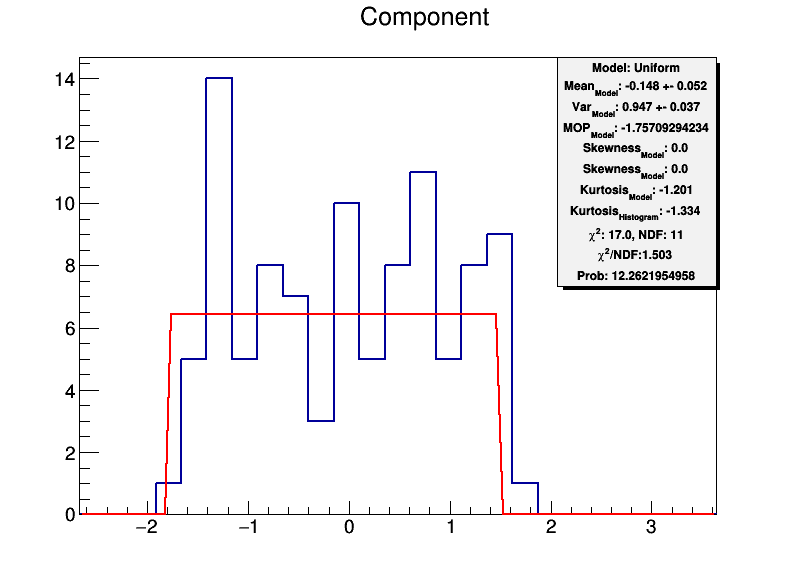

In [14]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100_run7.png')
c

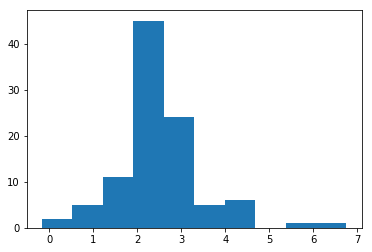

In [17]:
plt.hist(normalized_sources[2,:]*(-1)+2.5)
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


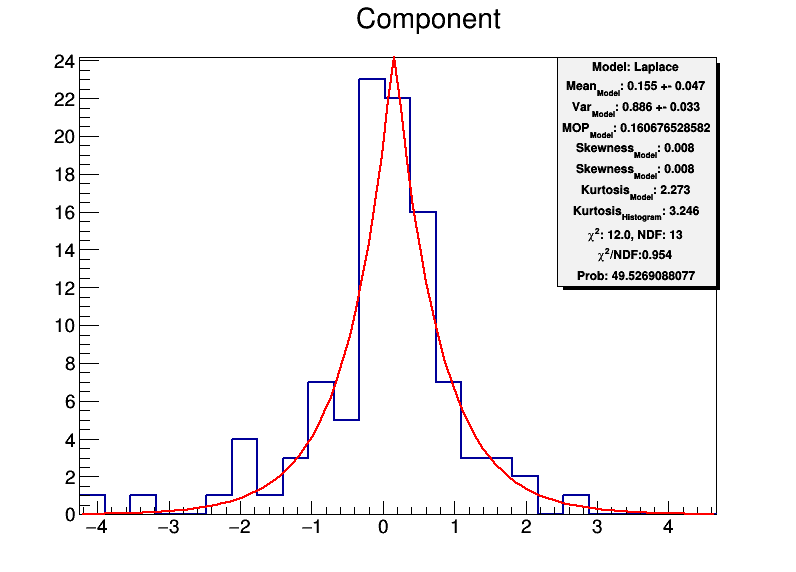

In [24]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:]), np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100_run7.png')
c

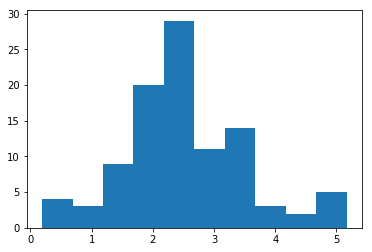

In [26]:
plt.hist(normalized_sources[3,:]+2.5)
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


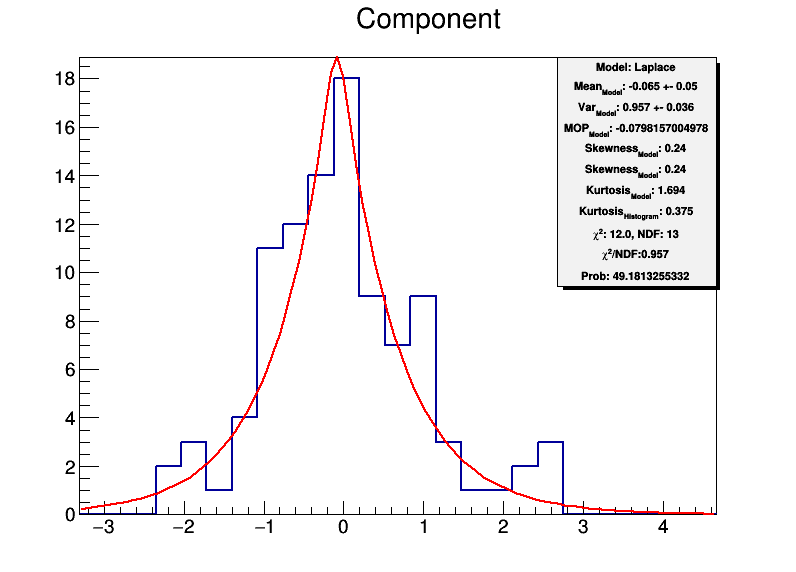

In [32]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[3,:])-1, np.max(normalized_sources[3,:])+2)
root_numpy.fill_hist(hist,normalized_sources[3,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[3,:]),np.max(normalized_sources[3,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_100_run7.png')
c

# Using 1000 stats

In [33]:
x = np.loadtxt('SeventhMixture1000Stats.txt')
x.shape

(4, 1000)

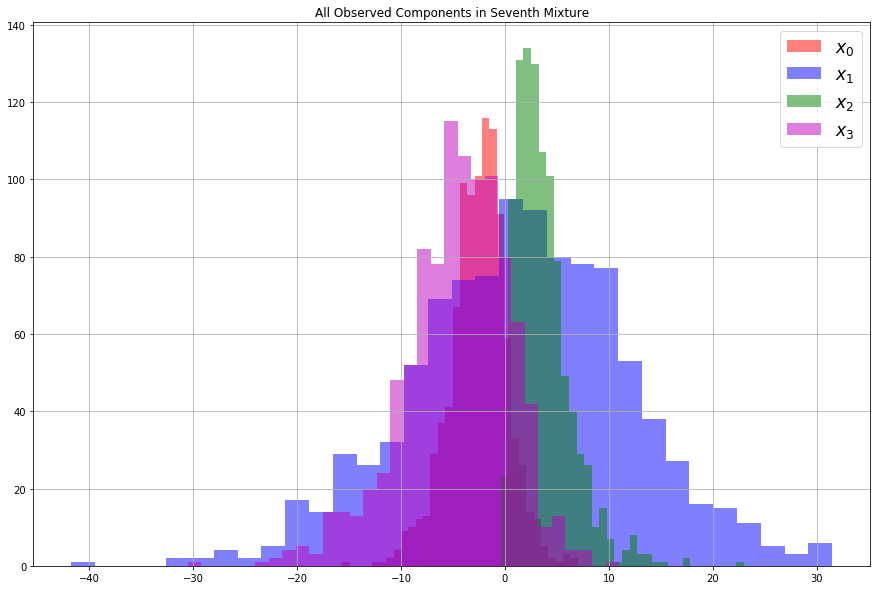

In [34]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture1000_all_run7.png')
plt.show()

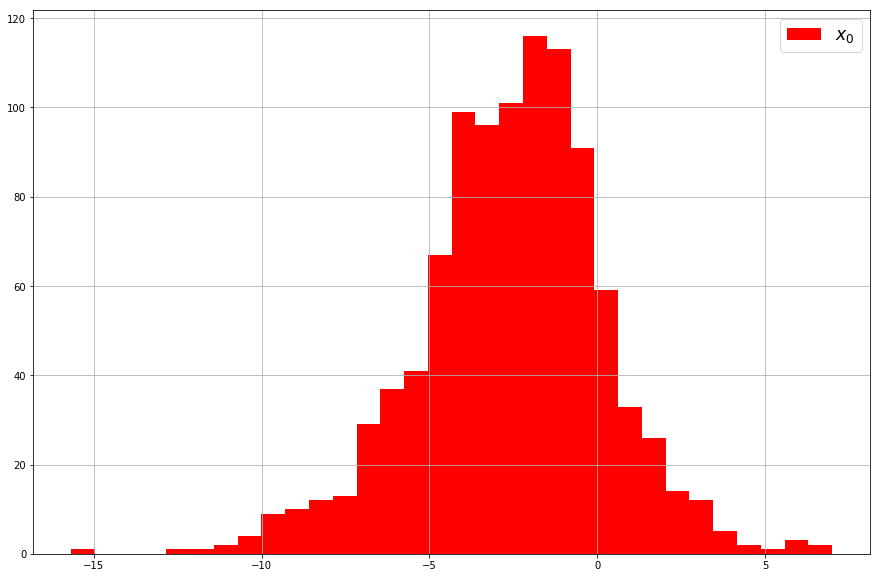

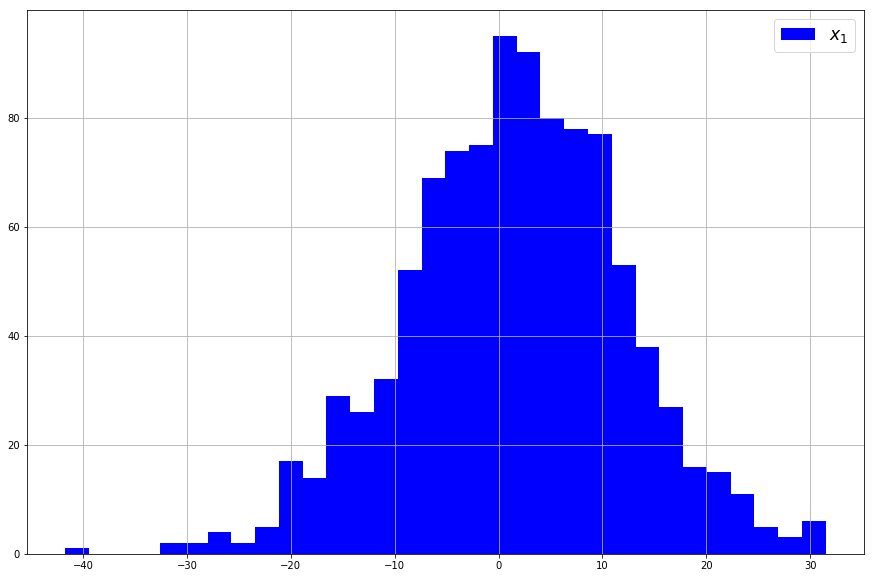

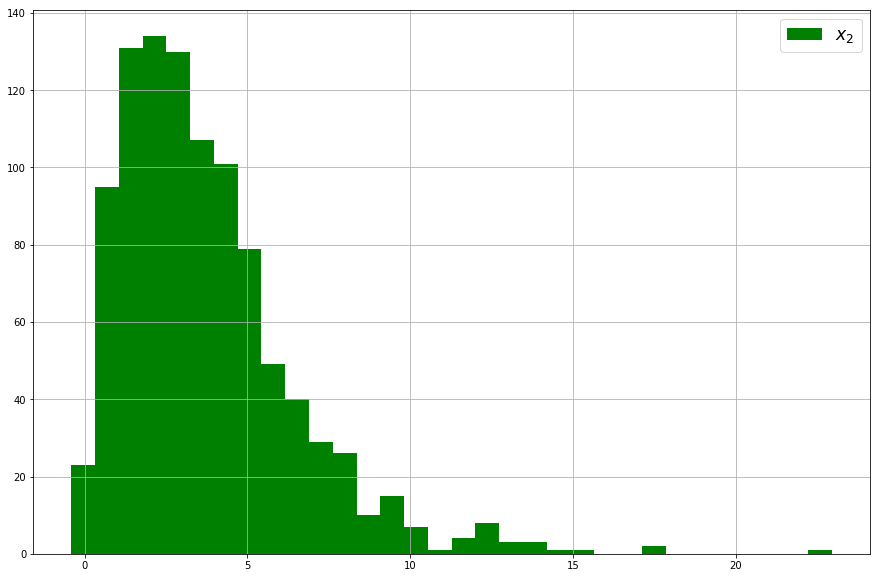

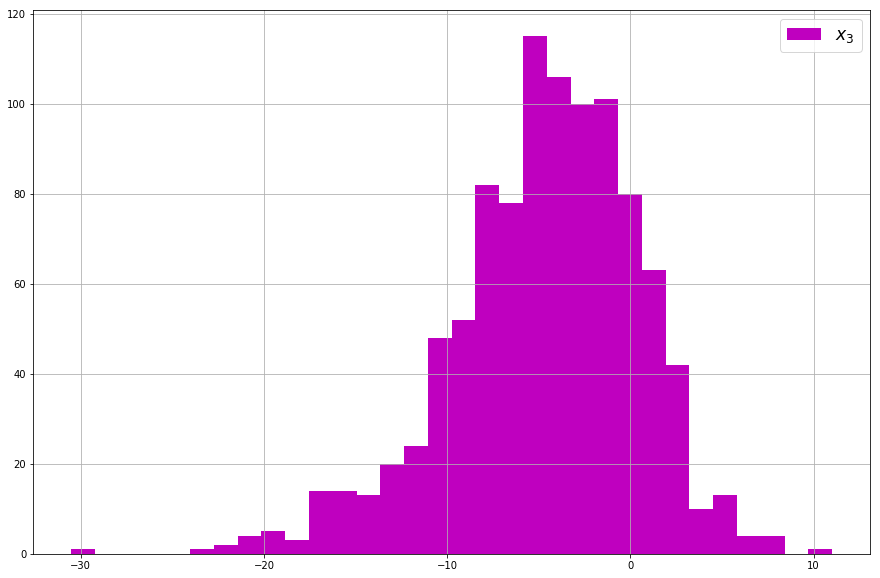

In [35]:

colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture1000_component_'+str(i)+'_run7.png')
    plt.show()

In [38]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=1000000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 6
Time to converges the FastICA: 0.006 seconds


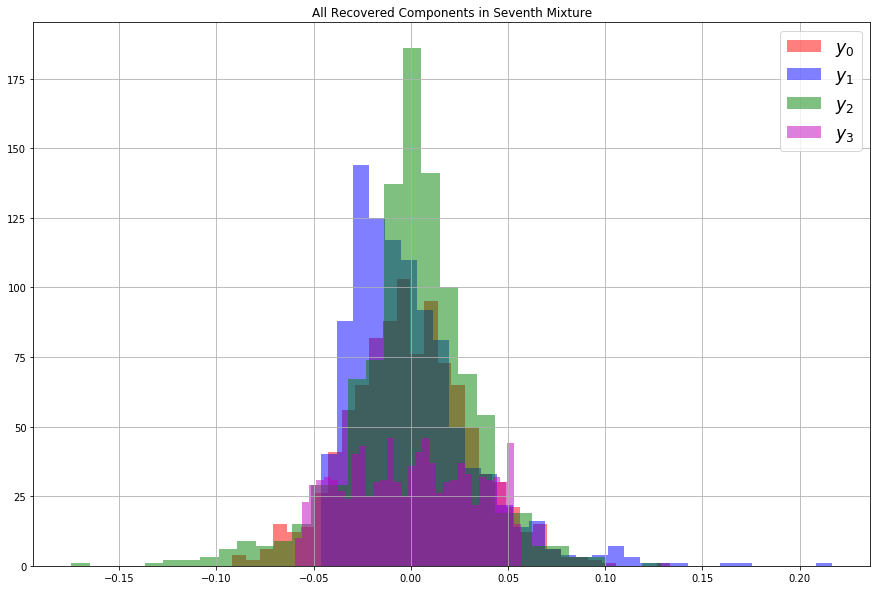

In [39]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA1000_all_run7.png')
plt.show()

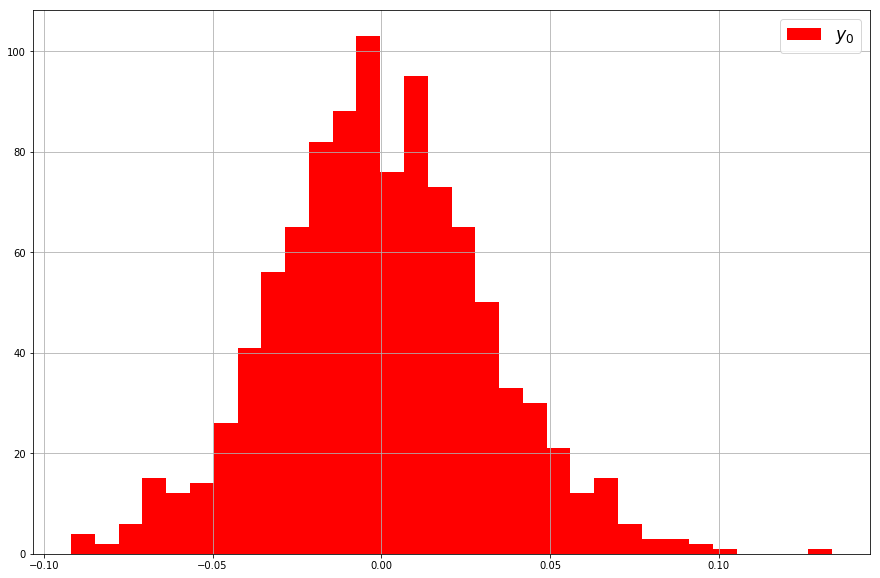

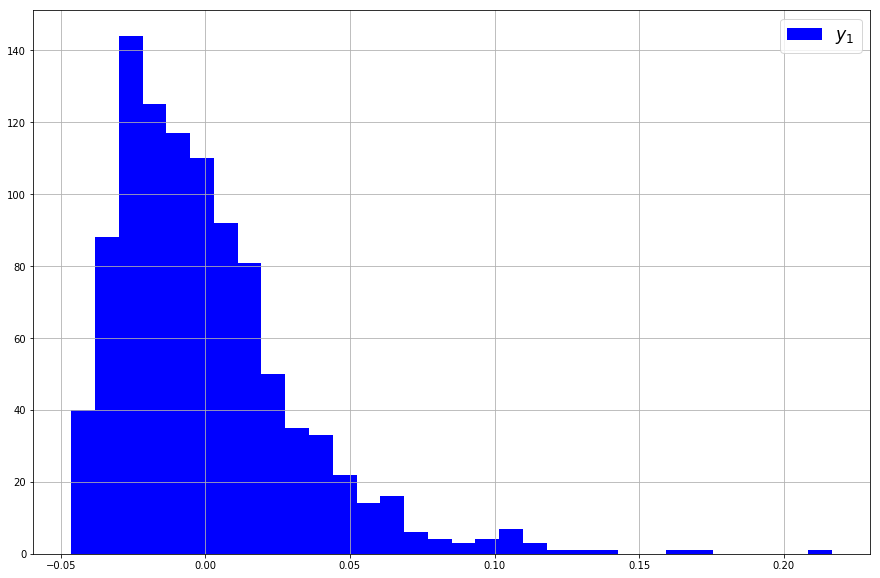

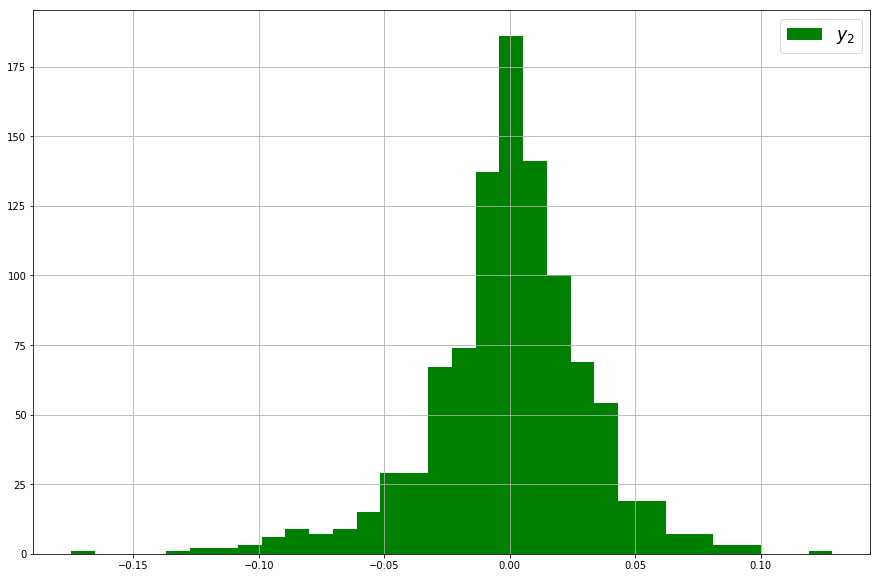

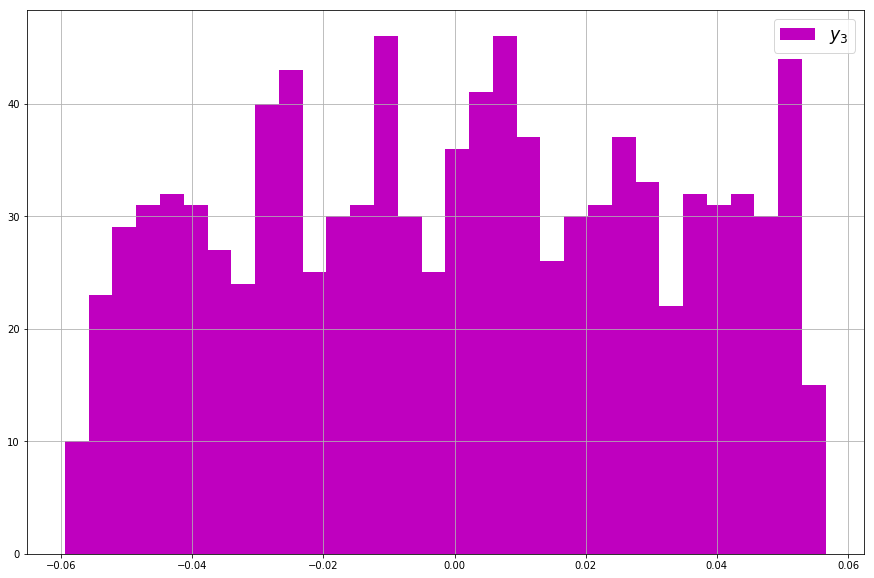

In [40]:

colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA1000_component_'+str(i)+'_run7.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


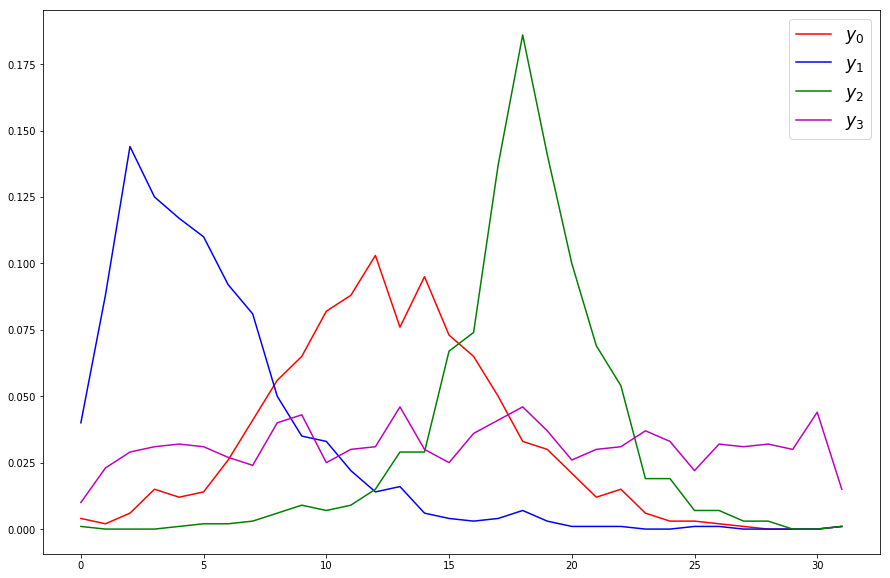

In [56]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA1000_run7.png')
plt.show()

In [42]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

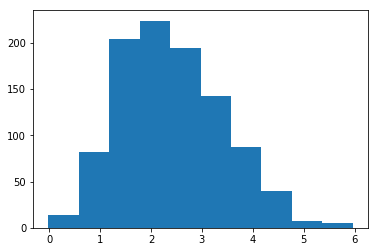

In [59]:
plt.hist(normalized_sources[1,:]+np.array(2.4))
plt.show()

In [44]:
bins = 100

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


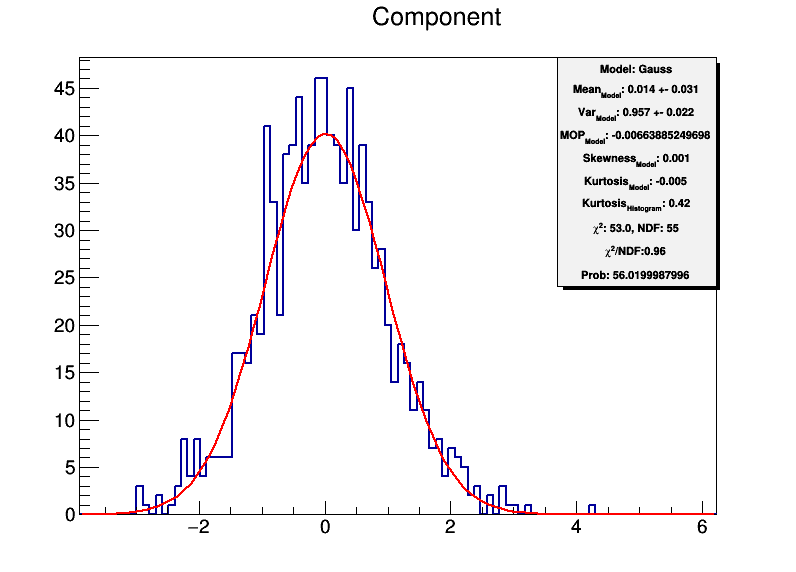

In [45]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='V')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_1000_run7.png')
c


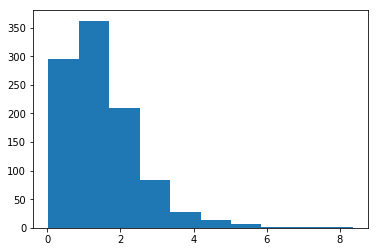

In [51]:
plt.hist(normalized_sources[1,:]+1.5)
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


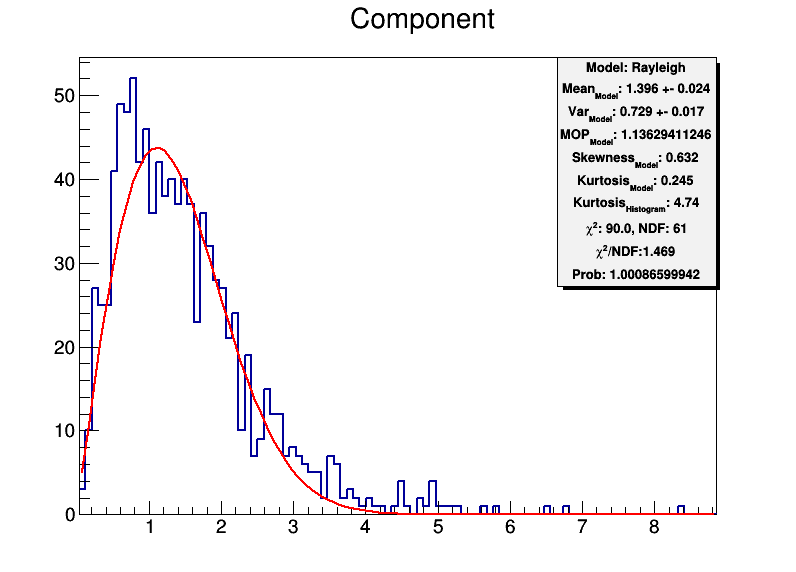

In [53]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:]+1.5), np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:]+1.5)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,np.min(normalized_sources[1,:]+np.array(1.5)),np.max(normalized_sources[1,:])+1,fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_1000_run7.png')
c


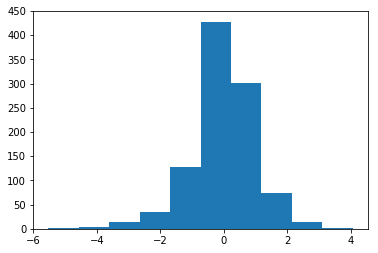

In [60]:
plt.hist(normalized_sources[2,:])
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


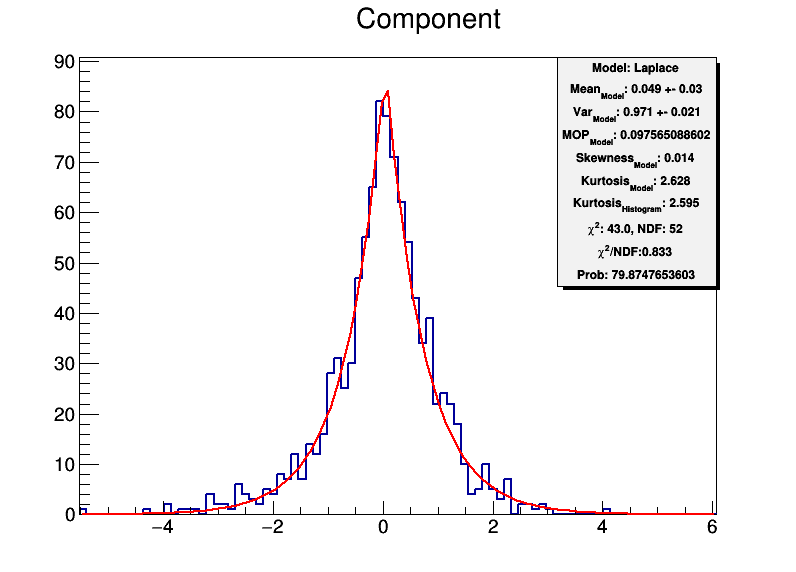

In [61]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', 90, np.min(normalized_sources[2,:]), np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_1000_run7.png')
c


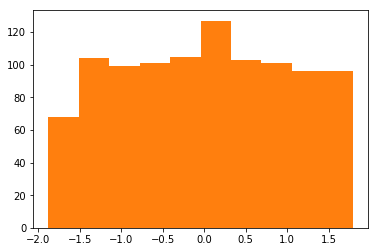

In [55]:
plt.hist(normalized_sources[3,:])
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


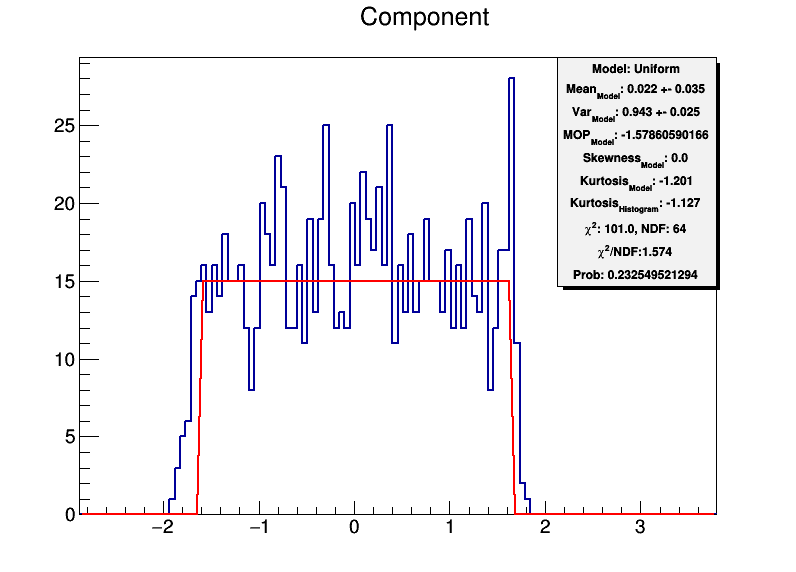

In [64]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', 120, np.min(normalized_sources[3,:])-1, np.max(normalized_sources[3,:])+2)
root_numpy.fill_hist(hist,normalized_sources[3,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[3,:]),np.max(normalized_sources[3,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_1000_run7.png')
c


# Using 100K stats

In [65]:
x = np.loadtxt('SeventhMixture100000Stats.txt')
x.shape

(4, 100000)

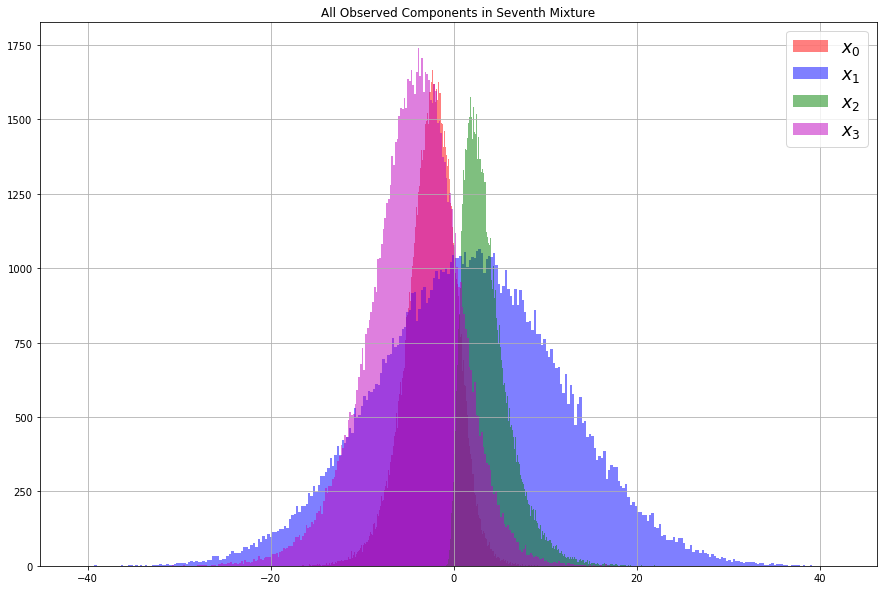

In [66]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100000_all_run7.png')
plt.show()

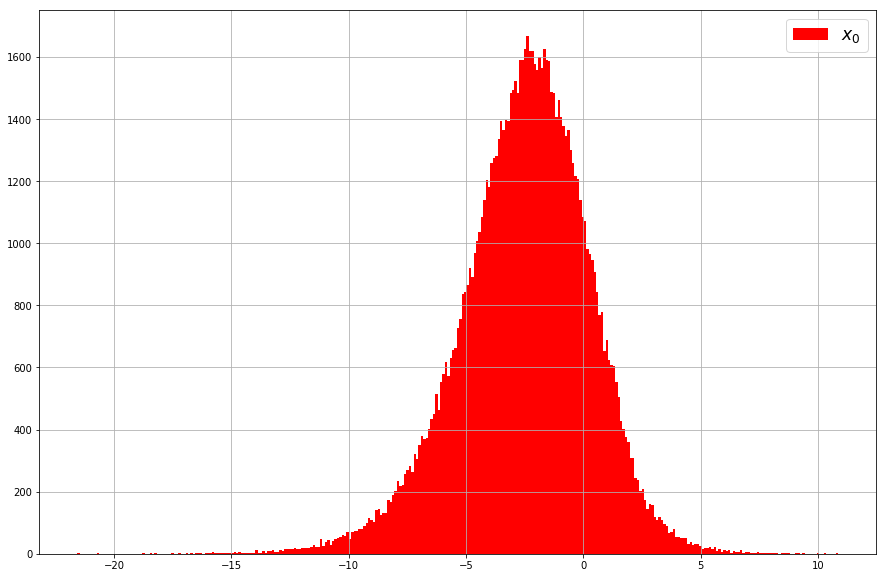

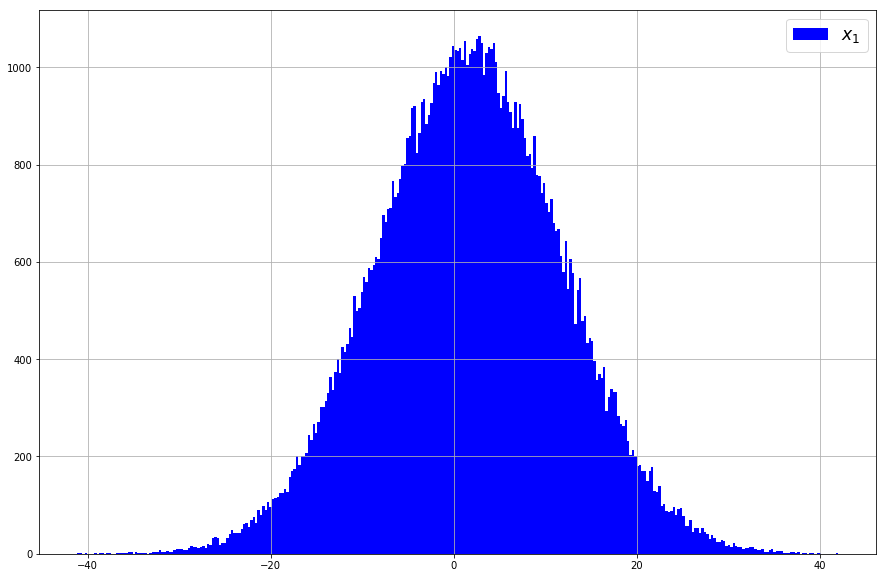

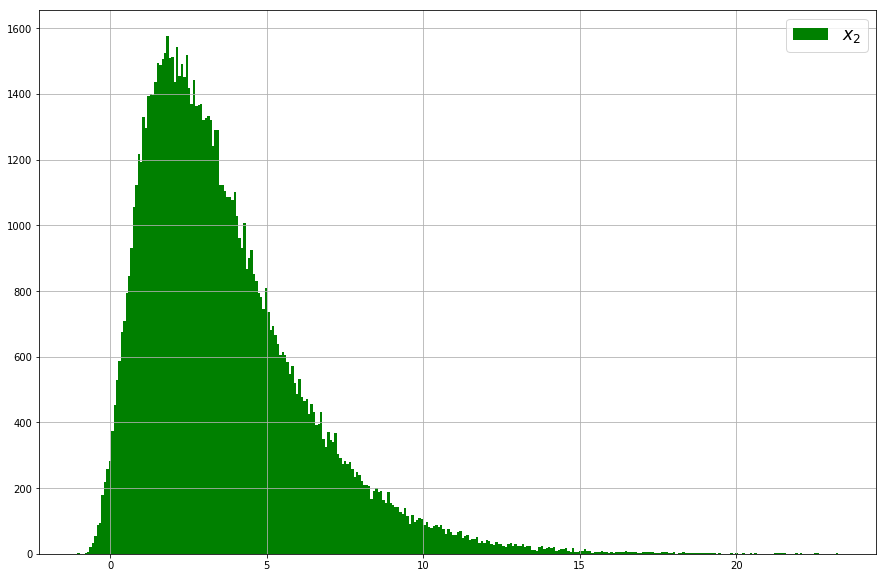

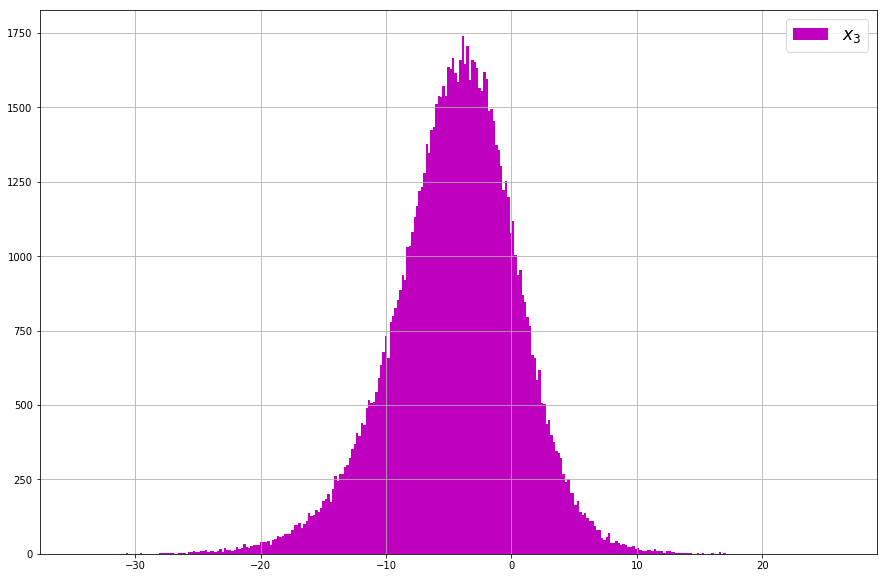

In [67]:

colors = ['r','b','g','m','y']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100000_component_'+str(i)+'_run7.png')
    plt.show()

In [68]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=15000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 5
Time to converges the FastICA: 0.276 seconds


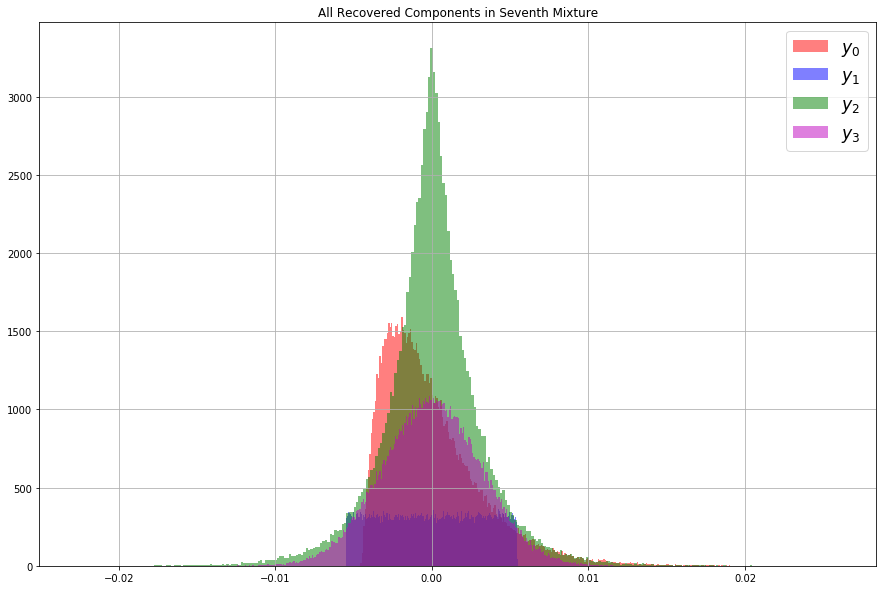

In [69]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Seventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100000_all_run7.png')
plt.show()

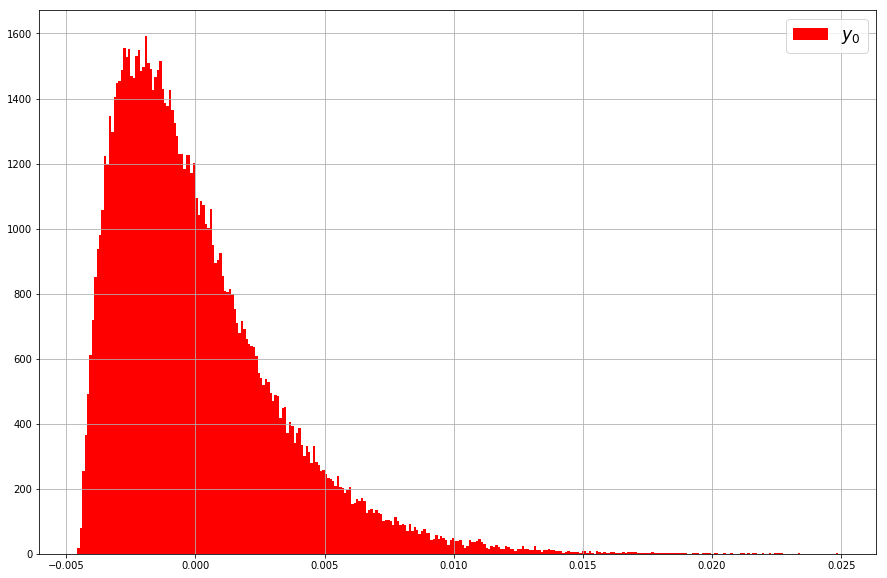

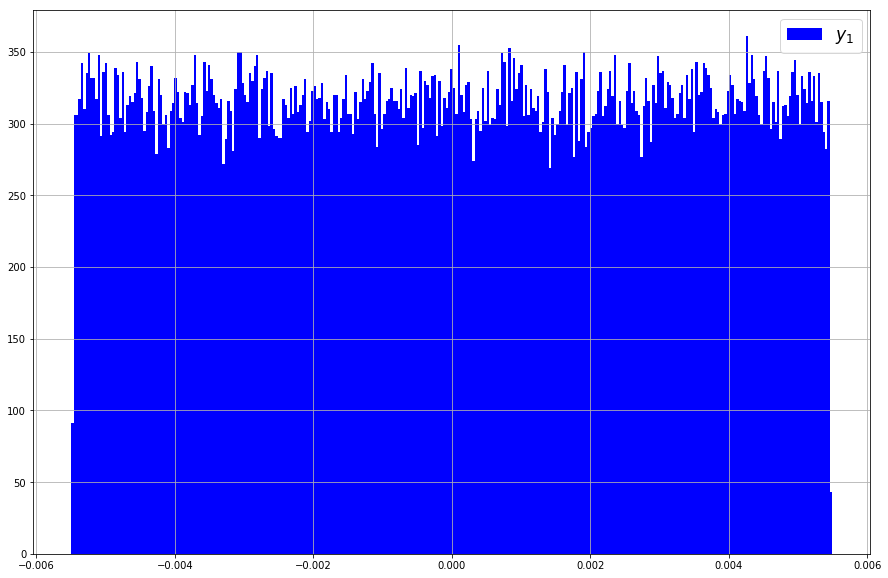

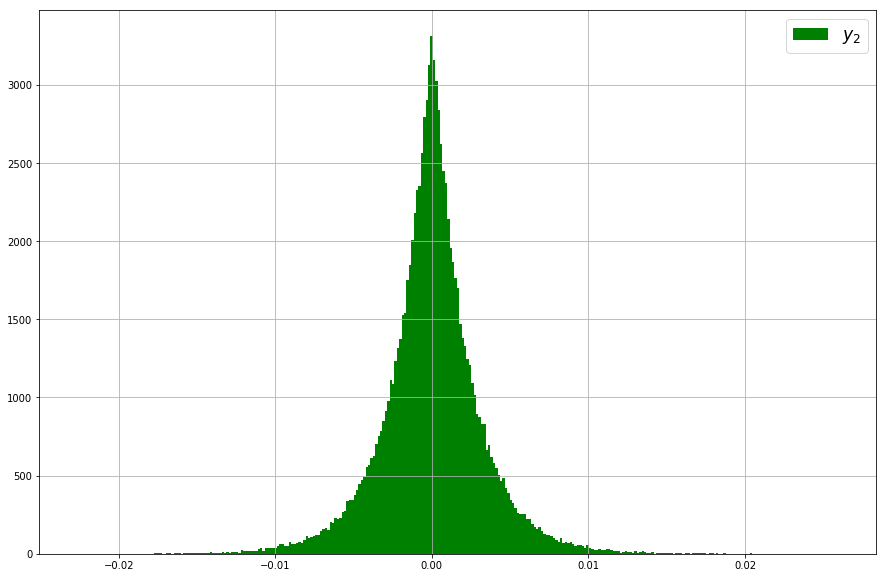

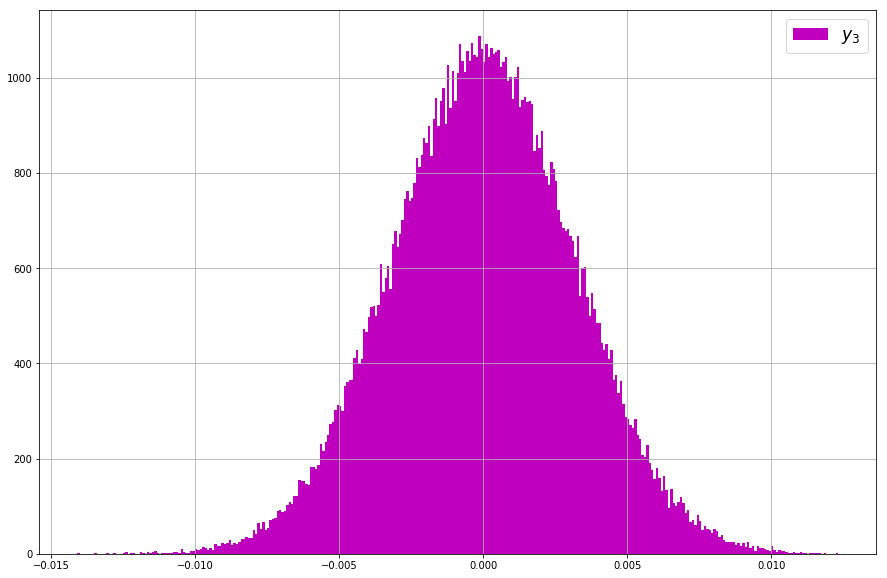

In [70]:

colors = ['r','b','g','m','y']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA100000_component_'+str(i)+'_run7.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


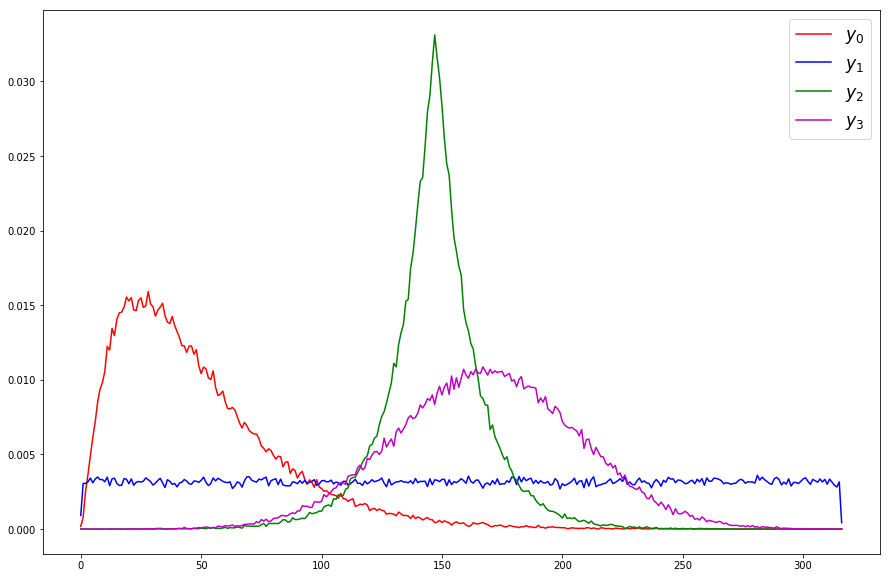

In [71]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m','y']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100000_run7.png')
plt.show()

In [72]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [73]:
bins = 150

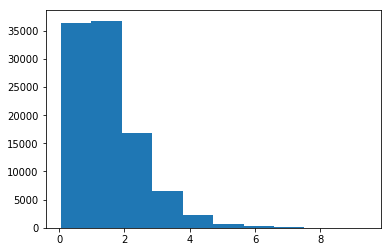

In [85]:
plt.hist(normalized_sources[0,:]+1.5)
plt.show()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


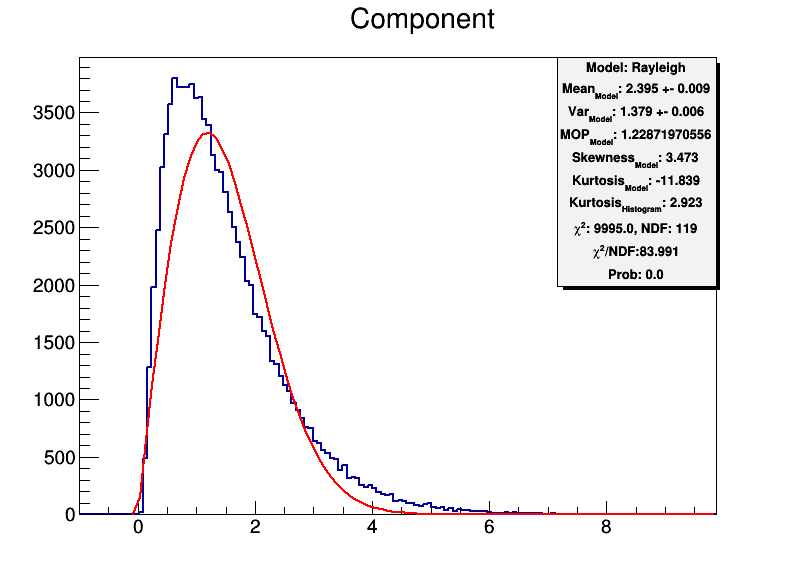

In [101]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', 150, -1., np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:]+1.5)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,0,np.max(normalized_sources[0,:]),fit_options='V')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100000_run7.png')
c

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


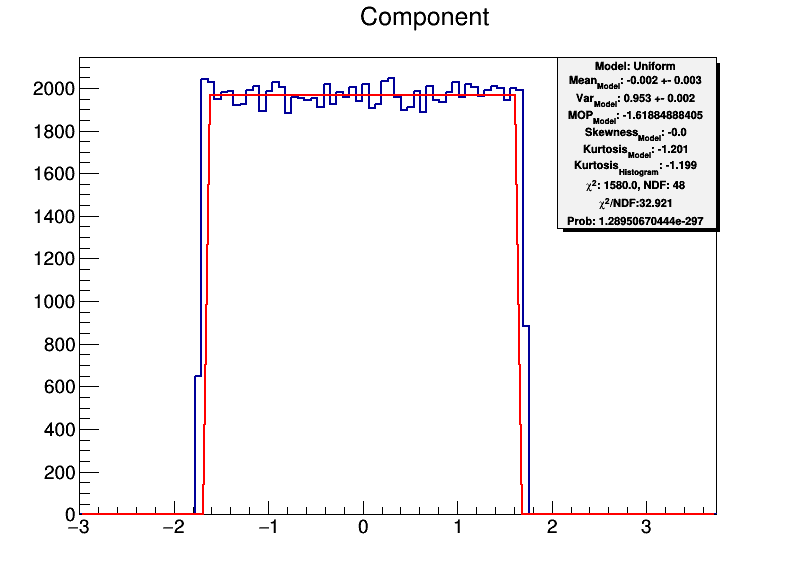

In [119]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', 99, -3, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,-2,2,fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.6, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100000_run7.png')
c

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


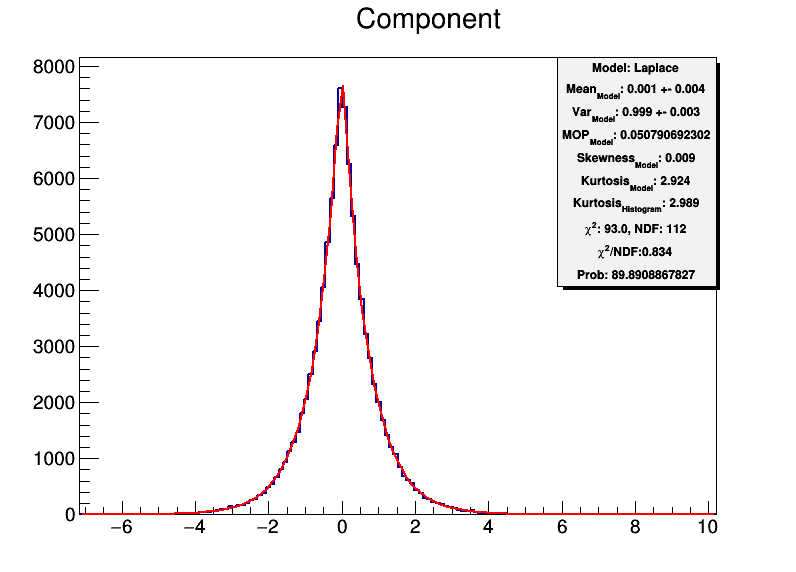

In [120]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:]), np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100000_run7.png')
c

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


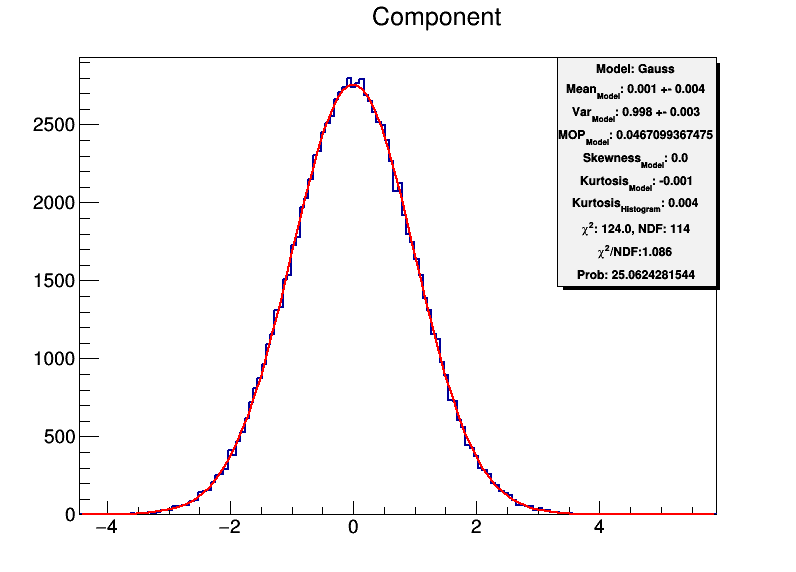

In [121]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[3,:]), np.max(normalized_sources[3,:])+2)
root_numpy.fill_hist(hist,normalized_sources[3,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[3,:]),np.max(normalized_sources[3,:]),fit_options='M')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_100000_run5.png')
c

Fit:0: RuntimeWarning: Abnormal termination of minimization.


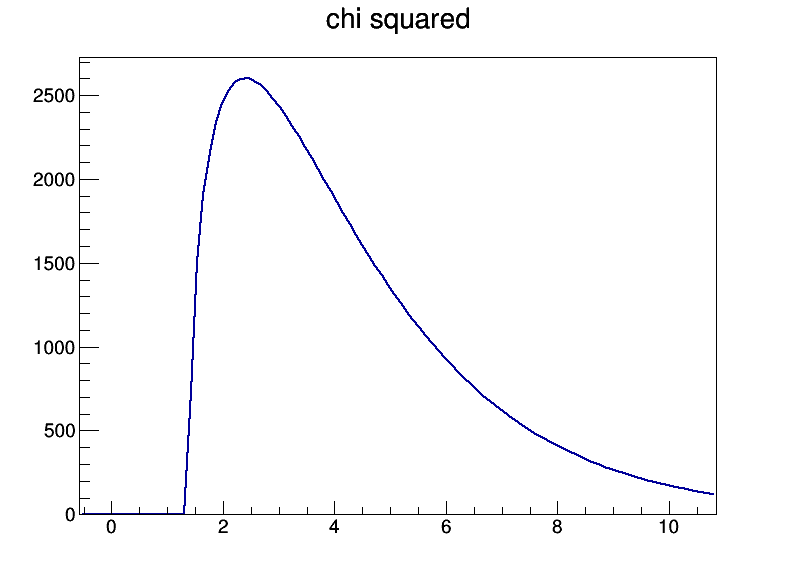

In [121]:
FitFunctions.fitChiSquared(hist,0,np.max(normalized_sources[3,:]),fit_options='WW')